In [1]:
### from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [5]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'selectivity_time_bins'

In [6]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
#load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [7]:
folder = './autorestore/preprocessing'
for var in ('time_ax', 'traces', 'events', 'areas', 'cycles',
            'is_rewardt', 'is_CSmt', 'CYCLE_START', 'CS_DURATION', 'DELAY'): 
    exec('%s = ut.load_variable(\'%s\', folder=\'%s\')'%(var, var, folder))
    
folder = './autorestore/lambo'
for var in ('reward_times', 'is_rewarded'): 
    exec('%s = ut.load_variable(\'%s\', folder=\'%s\')'%(var, var, folder))

In [8]:
def update_selectivity(selectivity, trial_types, between_what, and_what, append='', append_trial='t'):

    for t in trial_types:

        # this one selects which trials to consider
        which_cycles = eval('is_%s'%(t+append_trial))
#         print sum(which_cycles)

        if not np.any(which_cycles):
            continue
        
        selectivity[t+append] = ut.compute_selectivity(time_ax, events, cycles[which_cycles],
                                                       between_what, and_what)

In [9]:
#since CYCLE_START = -5, CS onset is at time 5
baseline_05s = (4.5,5)
durations_05s = (5,5.5),(5.5,6),(6,6.5),(6.5,7),(7,7.5),(7.5,8),(8,8.5),(8.5,9),(9,9.5),(9.5,10),(10,10.5),(10.5,11),(11,11.5),(11.5,12)
baseline_1s = (4,5)
durations_1s = (5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,12)
baseline_2s = (3,5)
durations_2s = (5,7),(7,9),(9,11),(11,13)

In [10]:
selectivity_05s = {}
selectivity_1s = {}
selectivity_2s = {}

for dur in durations_05s:
    update_selectivity(selectivity_05s, ['CSmt', 'rewardt'],dur, baseline_05s, eval("'_%ss'"%(dur[0]-5)), append_trial='')
for dur in durations_1s:
    update_selectivity(selectivity_1s, ['CSmt', 'rewardt'],dur, baseline_1s, eval("'_%ss'"%(dur[0]-5)), append_trial='')
for dur in durations_2s:
    update_selectivity(selectivity_2s, ['CSmt', 'rewardt'],dur, baseline_2s, eval("'_%ss'"%(dur[0]-5)), append_trial='')

times = reward_times[is_rewarded]
us_timeframe_licks_05 = np.c_[9+times,9+times+.5]
us_timeframe_licks_1 = np.c_[9+times,9+times+1]
us_timeframe_licks_2 = np.c_[9+times,9+times+2]
selectivity_05s['rewardt_licks'] = ut.compute_selectivity(time_ax, events, cycles[is_rewardt][is_rewarded],
                                               us_timeframe_licks_05, baseline_05s)
selectivity_1s['rewardt_licks'] = ut.compute_selectivity(time_ax, events, cycles[is_rewardt][is_rewarded],
                                               us_timeframe_licks_1, baseline_1s)
selectivity_2s['rewardt_licks'] = ut.compute_selectivity(time_ax, events, cycles[is_rewardt][is_rewarded],
                                               us_timeframe_licks_2, baseline_2s)

In [11]:
#cs_timeframe = (-CYCLE_START, CS_DURATION-CYCLE_START)
#tr_timeframe = (-CYCLE_START+CS_DURATION, -CYCLE_START+CS_DURATION+DELAY)
#cs_tr_timeframe = (-CYCLE_START, CS_DURATION-CYCLE_START+DELAY)
#us_timeframe = (CS_DURATION-CYCLE_START+DELAY, CS_DURATION-CYCLE_START+DELAY+2)
#prebaseline_timeframe = (-CYCLE_START-4, -CYCLE_START-2)
#baseline_timeframe = (-CYCLE_START-2, -CYCLE_START)
#baseline_cstr_timeframe = (-CYCLE_START-4, -CYCLE_START)
#selectivity = {}
#
#update_selectivity(selectivity, ['CSmt', 'rewardt'], (cs_timeframe), baseline_timeframe, '', append_trial='')
#update_selectivity(selectivity, ['CSmt', 'rewardt'], tr_timeframe, baseline_timeframe, '_tr', append_trial='')
#update_selectivity(selectivity, ['CSmt', 'rewardt'], cs_tr_timeframe, baseline_cstr_timeframe, '_cstr', append_trial='')
#update_selectivity(selectivity, ['CSmt', 'rewardt'], us_timeframe, baseline_timeframe, '_us', append_trial='')
#update_selectivity(selectivity, ['CSmt', 'rewardt'], prebaseline_timeframe, baseline_timeframe, '_prebs', append_trial='')
#
#times = reward_times[is_rewarded]
#us_timeframe_licks = np.c_[us_timeframe[0]+times, us_timeframe[0]+times+2]
#selectivity['rewardt_licks'] = ut.compute_selectivity(time_ax, events, cycles[is_rewardt][is_rewarded],
#                                               us_timeframe_licks, baseline_timeframe)

In [12]:
significance = 0.05

for t in np.sort(selectivity_1s.keys()):
    print t, np.mean([s[1]<significance for s in selectivity_1s[t][:, 0]])

CSmt_0s 0.0943396226415
CSmt_1s 0.169811320755
CSmt_2s 0.0943396226415
CSmt_3s 0.0377358490566
CSmt_4s 0.11320754717
CSmt_5s 0.0943396226415
CSmt_6s 0.169811320755
rewardt_0s 0.0943396226415
rewardt_1s 0.0943396226415
rewardt_2s 0.0943396226415
rewardt_3s 0.132075471698
rewardt_4s 0.169811320755
rewardt_5s 0.22641509434
rewardt_6s 0.207547169811
rewardt_licks 0.0943396226415


In [13]:
significance = 0.05

for t in np.sort(selectivity_1s.keys()):
    print t, np.mean(ut.adjust_pvalues([s[1] for s in selectivity_1s[t][:, 0]])<significance)

CSmt_0s 0.0
CSmt_1s 0.0754716981132
CSmt_2s 0.0188679245283
CSmt_3s 0.0
CSmt_4s 0.0
CSmt_5s 0.0
CSmt_6s 0.0188679245283
rewardt_0s 0.0188679245283
rewardt_1s 0.0
rewardt_2s 0.0
rewardt_3s 0.0943396226415
rewardt_4s 0.0377358490566
rewardt_5s 0.0
rewardt_6s 0.0
rewardt_licks 0.0188679245283


(0, 100)

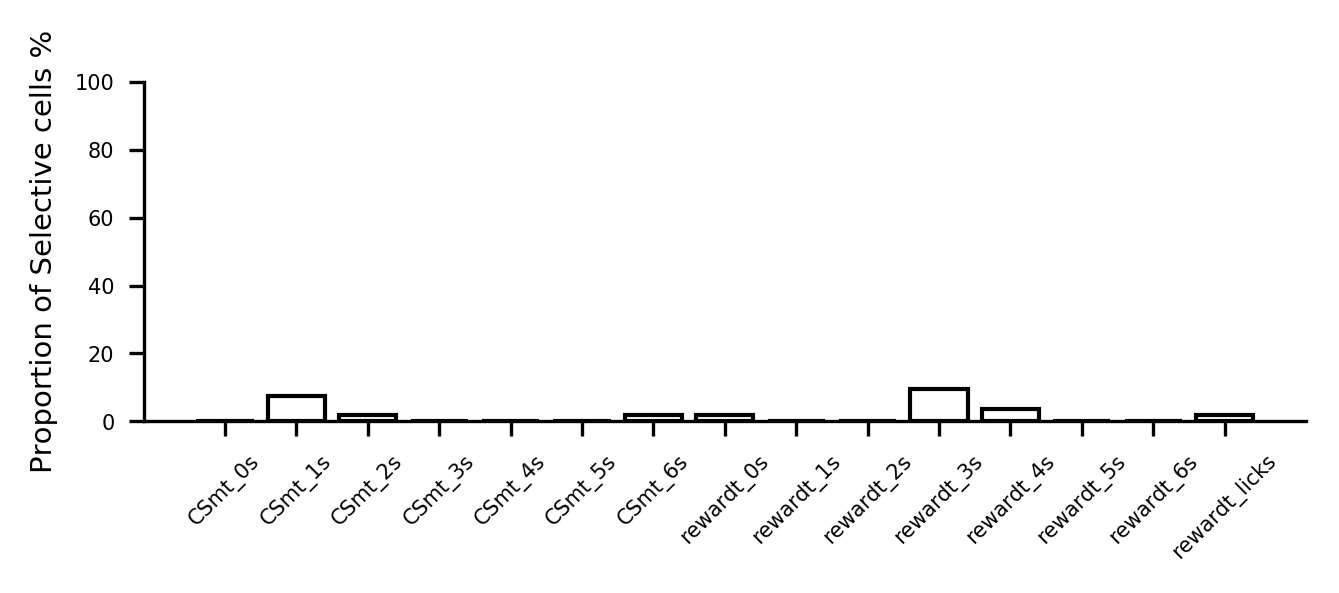

In [14]:
significance = 0.05

fig, ax = pl.subplots(1, 1, figsize=(5, 1.5))
values = [np.mean(ut.adjust_pvalues([s[1] for s in selectivity_1s[t][:, 0]])<significance)*100
          for t in np.sort(selectivity_1s.keys())]
pt.plot_bars(values, ax=ax)
ax.set_xticks(range(len(selectivity_1s)))
ax.set_xticklabels(np.sort(selectivity_1s.keys()), rotation=45)
pt.nicer_plot(ax)
ax.set_ylabel('Proportion of Selective cells %')
ax.set_ylim(0, 100)

In [15]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
